# Using Pipeline class from Transformers Library


In [1]:
import pathlib
from transformers import pipeline
from PIL import Image
import matplotlib.pylab as plt
import numpy as np

#### Extract all the images from our dataset and divide them into ground truths and unsegmented images.

In [2]:
imagepath = pathlib.Path('./Images/')
images = imagepath.glob('*')
inferred = []
GT = []
for image in images:
#     print(dir(image))
    
    if "GT" in image.name:
        GT.append(image)
#         print("GT" , image.name)
 
    elif "GT" not in image.name and "ipy" not in image.name:
        inferred.append(image)
#         print("inf", image.name)
GT_paths = sorted(GT)
input_paths = sorted(inferred)




# Test the generated mask with ground truth using SEE-Segment

In [3]:
import sys
sys.path.append('./see-segment/')

In [4]:
from see import Segment_Fitness as sf

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
C:\Users\dirkc\REPOS\hugging_face-1\envs\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


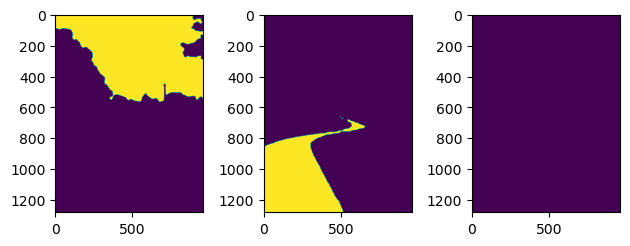

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


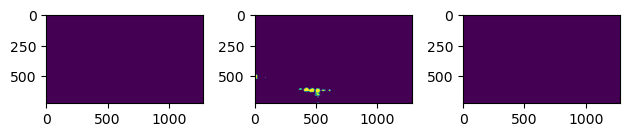

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


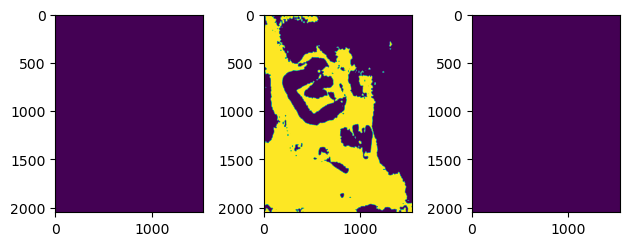

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


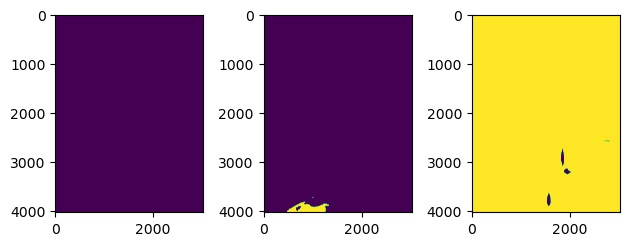

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


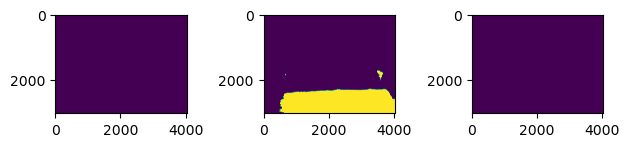

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


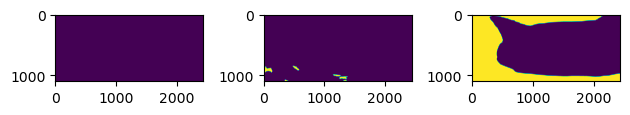

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


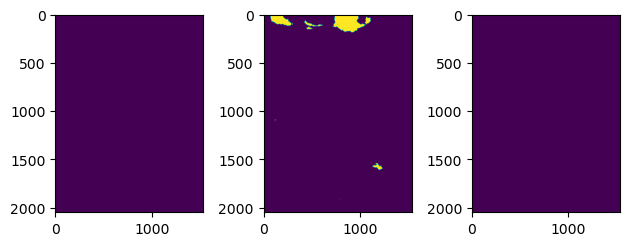

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


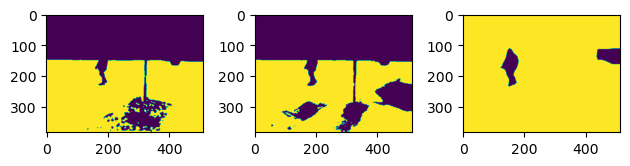

`label_ids_to_fuse` unset. No instance will be fused.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


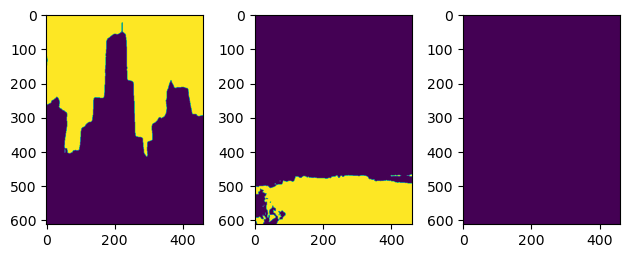

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

models = ["facebook/mask2former-swin-large-cityscapes-semantic",
          "nvidia/segformer-b0-finetuned-cityscapes-1024-1024",
          "apple/deeplabv3-mobilevit-small"]
#           "facebook/mask2former-swin-large-mapillary-vistas-semantic"]
#           "Intel/dpt-large-ade"]

fitness_table = []
for image_path, GT_path in zip(input_paths, GT_paths):
    
    image = Image.open(image_path).convert("RGB")
    
    # NOTE TO DIRK, why does adding [:,:,0] change the fitness?
    GT_image = np.array(Image.open(GT_path).convert("RGB"))[:,:,0]
    
    # Create subplots for each model's segmented image
    fig, axs = plt.subplots(1, len(models))
    
    fitness = []
    # Iterate over the models and display segmented images
    for i, model_name in enumerate(models):
        # Initialize an image segmentation pipeline
        segmentation_pipeline = pipeline("image-segmentation", model=model_name)
        outputs = segmentation_pipeline(image)
        inferred_segmentation = outputs[0]['mask']

        # Display the segmented image in the corresponding subplot
        ax = axs[i] if len(models) > 1 else axs
        ax.imshow(inferred_segmentation)
        fit = sf.FitnessFunction(np.array(inferred_segmentation), GT_image)
        fitness.append(fit[0])
        
    fitness_table.append(fitness)
        
    # Adjust the layout to avoid overlapping images
    fig.tight_layout()

    # Show the figure for the current image
    plt.show()


In [9]:
fitness_table

[[1.5, 1.0000164101680447, 1.5],
 [1.5, 1.5, 1.5],
 [1.5, 1.5, 1.5],
 [1.5, 1.5, 1.000090475633297],
 [1.5, 1.0047392819318648, 1.5],
 [1.5, 1.5, 1.5],
 [1.5, 1.5, 1.5],
 [1.5, 1.5, 1.5],
 [1.5, 1.5, 1.5]]